In [80]:
import pandas as pd
pd.set_option('display.max_colwidth', 250)
pd.set_option('max_rows', 2500)
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import os
import numpy as np
import nltk
import pickle
import gensim
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from gensim import corpora
from nltk.tag.stanford import StanfordPOSTagger
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [81]:
greve_twitter = pd.read_csv('greve_twitter_classif2.csv',index_col=[0])
greve_twitter.head()

,polarity,date,tweet,tweet_processed,tweet_processed2
0,negatif,2019-12-30,Comment les travailleurs belges ont bloqué la #RetraiteParPoints #FiersDeLaGreve #reformedesretraites . #GiletsJaunes #greve31decembre #cgt #fo #sudrail #France #Belgique #BFMTV #lci #cnews,comment travailleurs belges bloqué retraiteparpoints fiersdelagreve reformedesretraites giletsjaunes greve31decembre cgt fo sudrail france belgique bfmtv lci cnews,comment travailleur belge bloquer retraiteparpoints fiersdelagreve reformedesretraites giletsjaunes greve31decembre cgt fo sudrail france belgique bfmtv lci cnews
1,negatif,2019-12-30,#Retraites #ReformeRetraites #reformedesretraites #Macron #GiletsJaunes #greve31decembre #CGT #EdouardPhilippe #SNCF #RATP #FiersDeLaGreve 𝟮𝟳 𝗲𝗺𝗲 𝗷𝗼𝘂𝗿 de #Greve contre la Réforme...,retraites reformeretraites reformedesretraites macron giletsjaunes greve31decembre cgt edouardphilippe sncf ratp fiersdelagreve 𝟮𝟳 𝗲𝗺𝗲 𝗷𝗼𝘂𝗿 greve contre réforme,retraiter reformeretraites reformedesretraites macron giletsjaunes greve31decembre cgt edouardphilippe sncf ratp fiersdelagreve 𝟮𝟳 𝗲𝗺𝗲 𝗷𝗼𝘂𝗿 greve contrer réformer
2,negatif,2019-12-30,#Réformedesretraites : le ton monte entre le ⁦@gouvernementFR⁩ et la #CGT - Le Parisien,réformedesretraites monte entre cgt parisien,réformedesretraites monter entrer cgt parisien
3,negatif,2019-12-30,Apparemment ça dérange beaucoup ! ! #France #greve31decembre #reformedesretraites #GiletsJaunes #Coulommiers #écologie https://twitter.com/franck77120/status/1211370152933167105,apparemment ça dérange beaucoup france greve31decembre reformedesretraites giletsjaunes coulommiers écologie,apparemment ça déranger beaucoup france greve31decembre reformedesretraites giletsjaunes coulommiers écologie
4,negatif,2019-12-30,"Tout à fait, un stress permanent qui se rajoutera à celui du travail, de la recherche d'un emploi, de la perte d'un emploi #reformedesretraites #RetraiteParPoints .",tout fait stress permanent rajoutera celui travail recherche emploi perte emploi reformedesretraites retraiteparpoints,tout faire stress permanent rajouter celui travail rechercher emploi perte emploi reformedesretraites retraiteparpoints


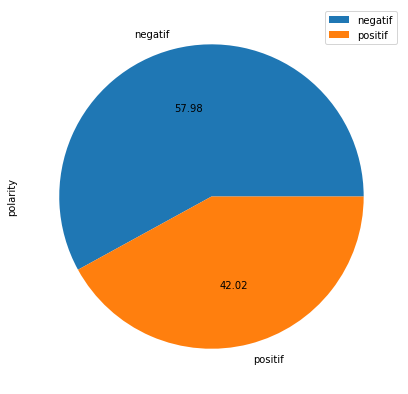

In [82]:
greve_twitter.polarity.value_counts().plot.pie(figsize=(7,7), autopct='%.2f')
plt.legend()
plt.savefig('greve_pie.png')
plt.show()

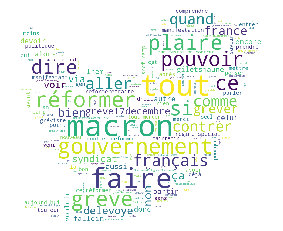

In [83]:
twitter_mask = np.array(Image.open("./twitter_mask.png")) 
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale']
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110,width=1800,
                      height=1400,
                      stopwords=stopwords,mask=twitter_mask).generate(all_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_2.png', dpi=1200)
plt.show()

In [21]:
#greve_twitter.date = greve_twitter.date.map(lambda x: str(x)[:-15])

In [62]:
greve_twitter['date']= pd.to_datetime(greve_twitter['date'])

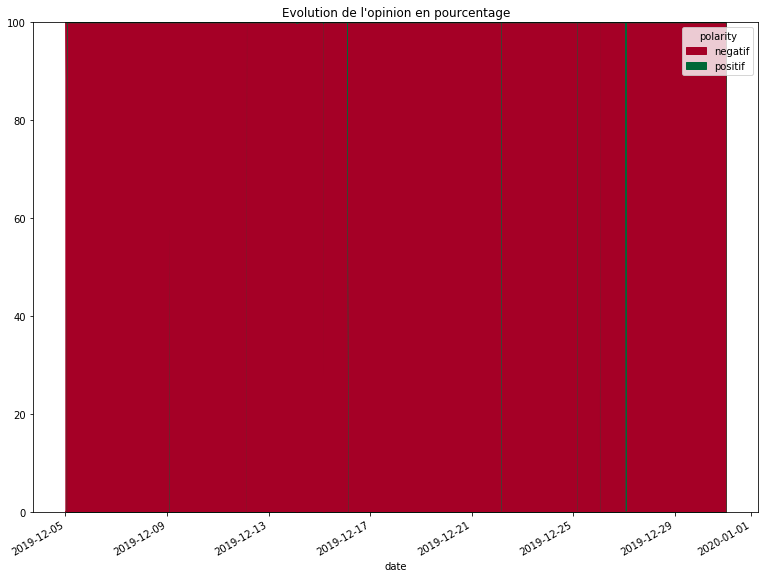

In [63]:
data = greve_twitter.groupby(["date","polarity"]).size()#/data.polarity.count()*100
data_perc = data.unstack()
data_perc = data_perc.divide(data_perc.sum(axis=1),axis=0)*100
ax = data_perc.plot.area(figsize=(13,10), colormap='RdYlGn',ylim=(0,100))
plt.title("Evolution de l'opinion en pourcentage")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

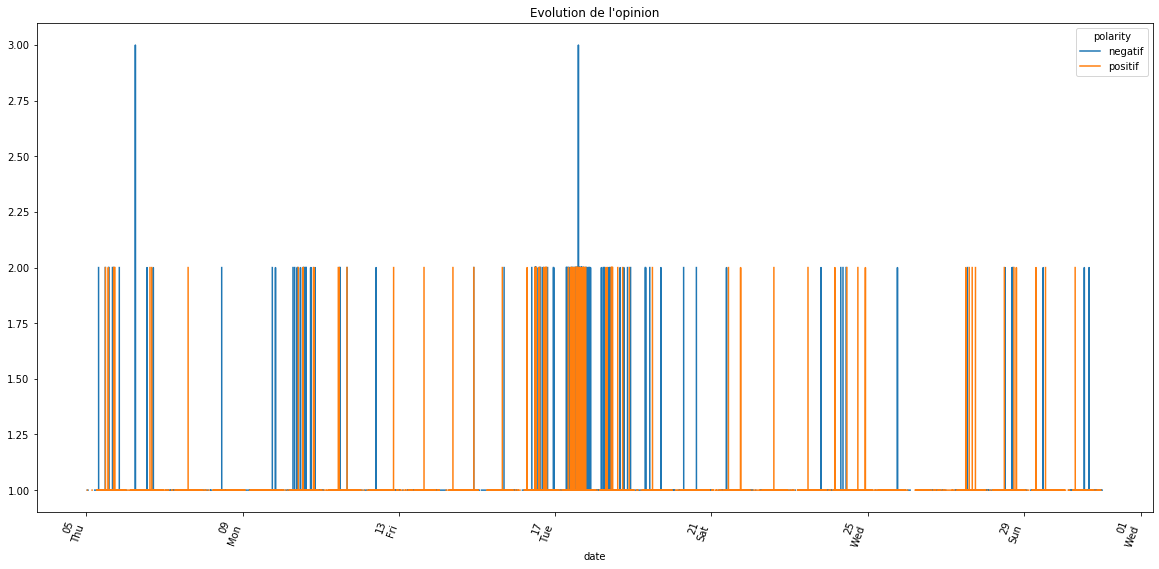

In [64]:
data = greve_twitter.groupby(["date","polarity"]).size()
ax= data.unstack().plot(figsize=(20,10),rot=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%a'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d\n%a'))
plt.title("Evolution de l'opinion")
plt.show
#début grève 5/12, PM 'transitions progressives', manif 10/12,démission Delevoye 16/12, 
# manif 17/12 (3x plus de manif que le 10), 27/12 cap de la plus longue grève contre retraites (1995)

In [29]:
#séparation des dataframes en positif et negatif
greve_negatif = greve_twitter[greve_twitter.polarity=='negatif']
greve_positif = greve_twitter[greve_twitter.polarity=='positif']

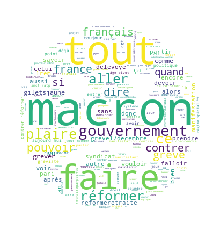

In [32]:
#df négatifs + wordcloud
text_negatif = ' '.join([x for x in greve_negatif.tweet_processed2])
sad_mask = np.array(Image.open("./sad.png"))
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110, width=1800,
                      height=1400,
                      stopwords=stopwords,mask=sad_mask).generate(text_negatif)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./sad_wordcloud.png', dpi=1200)
plt.show()

In [33]:
neg_word=greve_negatif.tweet_processed2.str.split(expand=True).stack().value_counts()
neg_word.head(10)

reformedesretraites    17895
retraiter               7279
macron                  3225
faire                   3152
contrer                 2930
plaire                  2759
tout                    2696
grevegenerale           2562
giletsjaunes            2431
aller                   2004
dtype: int64

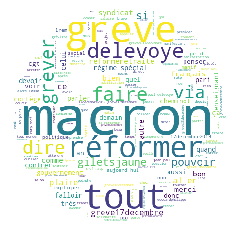

In [34]:
#df positifs + wordcloud
text_positif = ' '.join([x for x in greve_positif.tweet_processed2])
happy_mask = np.array(Image.open("./happy.png")) 
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale']
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110,width=1800,
                      height=1400,
                      stopwords=stopwords,mask=happy_mask).generate(text_positif)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./happy_wordcloud.png', dpi=1200)
plt.show()

In [35]:
text_positifok = text_positif.split()

In [36]:
len(text_positifok)

148377

In [37]:
pos_word=greve_positif.tweet_processed2.str.split(expand=True).stack().value_counts()
pos_word.head(10)

reformedesretraites    11180
retraiter               2181
macron                  1439
réformedesretraites     1409
tout                    1263
greve                   1115
delevoye                1083
greve17decembre         1028
réformer                 930
giletsjaunes             907
dtype: int64

In [38]:
stopwords0=['réformedesretraites','retraiter','grevegenerale','reformedesretraites']
text_data=[]
text_data1=[]
text_data0 = greve_twitter['tweet_processed2'].tolist()
for x in text_data0:
    text_data1.append(nltk.word_tokenize(x))
for y in text_data1:
    y=[word for word in y if word not in stopwords0]
    text_data.append(y)

In [39]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(x) for x in text_data if x not in stopwords0]
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [40]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.015*"macron" + 0.010*"parler" + 0.009*"aller" + 0.009*"france" + 0.008*"faire" + 0.008*"lci" + 0.007*"tout" + 0.007*"devoir" + 0.007*"giletsjaunes" + 0.006*"quand"')
(1, '0.023*"régime" + 0.019*"contrer" + 0.014*"spécial" + 0.013*"5decembre" + 0.009*"avocat" + 0.008*"général" + 0.008*"non" + 0.008*"25" + 0.007*"aller" + 0.006*"bon"')
(2, '0.019*"tout" + 0.018*"faire" + 0.016*"plaire" + 0.013*"ce" + 0.011*"aller" + 0.011*"pouvoir" + 0.010*"dire" + 0.010*"réformer" + 0.010*"celui" + 0.008*"gouvernement"')
(3, '0.035*"contrer" + 0.030*"grevedu5decembre" + 0.024*"manifestation" + 0.023*"giletsjaunes" + 0.019*"grever" + 0.016*"greve17decembre" + 0.014*"greve5decembre" + 0.014*"5decembre" + 0.014*"macron" + 0.014*"reformeretraites"')
(4, '0.024*"delevoye" + 0.017*"greve10decembre" + 0.016*"macron" + 0.009*"delevoyegate" + 0.009*"jeudi" + 0.009*"edouardphilippe" + 0.008*"vidéo" + 0.008*"reformeretraites" + 0.008*"âge" + 0.008*"tout"')


In [44]:
d = {}
x=0
while x < len(topics):
    for topic[x] in topics:
        topic[x] = list(topic[x])
        topic[x] = "".join(map(str,topic[x]))
        topic[x] = topic[x].split('"')[1::2]
        x+=1
topic

TypeError: 'tuple' object does not support item assignment

In [ ]:
df_topic1 = pd.DataFrame(topic[1], columns=['words'])
df_topic2 = pd.DataFrame(topic[2], columns=['words'])
df_topic3 = pd.DataFrame(topic[3], columns=['words'])
df_topic4 = pd.DataFrame(topic[4], columns=['words'])
df_topic5 = pd.DataFrame(topic[0], columns=['words'])

In [ ]:
df_topic1

In [ ]:
df_topic2

In [ ]:
df_topic3

In [ ]:
df_topic4

In [ ]:
df_topic5

In [ ]:
java_path = "C:\\Program Files (x86)\\Java\\jre1.8.0_231\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path
path_to_model = "./stanford-postagger-full-2018-10-16/models/french.tagger"
path_to_jar = "./stanford-postagger-full-2018-10-16/stanford-postagger.jar"
tagger=StanfordPOSTagger(path_to_model, path_to_jar)

print(tagger.tag(sentence.split()))

In [ ]:
adj_pos1 = [word for word, tags in tagger.tag(text_positif.split()[0:6999]) if tags==('ADJ')] 

In [ ]:
adj_pos2 = [word for word, tags in tagger.tag(text_positif.split()[7000:13999]) if tags==('ADJ')] 

In [ ]:
adj_pos3 = [word for word, tags in tagger.tag(text_positif.split()[15000:20999]) if tags==('ADJ')] 

In [ ]:
adj_pos4 = [word for word, tags in tagger.tag(text_positif.split()[22000:27999]) if tags==('ADJ')] 

In [ ]:
adj_pos5 = [word for word, tags in tagger.tag(text_positif.split()[28000:32999]) if tags==('ADJ')] 

In [ ]:
adj_pos6 = [word for word, tags in tagger.tag(text_positif.split()[35000:40999]) if tags==('ADJ')] 

In [ ]:
adj_pos7 = [word for word, tags in tagger.tag(text_positif.split()[42000:47999]) if tags==('ADJ')] 

In [ ]:
adj_pos8 = [word for word, tags in tagger.tag(text_positif.split()[48000:53999]) if tags==('ADJ')] 

In [ ]:
adj_pos9 = [word for word, tags in tagger.tag(text_positif.split()[55000:59999]) if tags==('ADJ')] 

In [ ]:
adj_pos10 = [word for word, tags in tagger.tag(text_positif.split()[60000:64999]) if tags==('ADJ')] 

In [ ]:
adj_pos11 = [word for word, tags in tagger.tag(text_positif.split()[65000:69999]) if tags==('ADJ')] 

In [ ]:
adj_pos12 = [word for word, tags in tagger.tag(text_positif.split()[70000:74999]) if tags==('ADJ')] 

In [ ]:
adj_pos13 = [word for word, tags in tagger.tag(text_positif.split()[75000:79999]) if tags==('ADJ')] 

In [ ]:
adj_pos14 = [word for word, tags in tagger.tag(text_positif.split()[80000:84999]) if tags==('ADJ')] 

In [ ]:
adj_pos15 = [word for word, tags in tagger.tag(text_positif.split()[85000:89999]) if tags==('ADJ')] 

In [ ]:
adj_pos16 = [word for word, tags in tagger.tag(text_positif.split()[90000:94999]) if tags==('ADJ')] 

In [ ]:
adj_pos17 = [word for word, tags in tagger.tag(text_positif.split()[95000:99999]) if tags==('ADJ')] 

In [ ]:
adj_pos18 = [word for word, tags in tagger.tag(text_positif.split()[100000:104999]) if tags==('ADJ')] 

In [ ]:
adj_pos19 = [word for word, tags in tagger.tag(text_positif.split()[105000:109999]) if tags==('ADJ')] 

In [ ]:
adj_pos20 = [word for word, tags in tagger.tag(text_positif.split()[110000:114999]) if tags==('ADJ')] 

In [ ]:
adj_pos21 = [word for word, tags in tagger.tag(text_positif.split()[115000:119999]) if tags==('ADJ')] 

In [ ]:
adj_pos22 = [word for word, tags in tagger.tag(text_positif.split()[120000:124999]) if tags==('ADJ')] 

In [ ]:
adj_pos23 = [word for word, tags in tagger.tag(text_positif.split()[125000:129999]) if tags==('ADJ')] 

In [ ]:
adj_pos24 = [word for word, tags in tagger.tag(text_positif.split()[130000:134999]) if tags==('ADJ')] 

In [ ]:
adj_pos25 = [word for word, tags in tagger.tag(text_positif.split()[160000:165999]) if tags==('ADJ')] 

In [ ]:
adj_pos26 = [word for word, tags in tagger.tag(text_positif.split()[167000:171999]) if tags==('ADJ')] 

In [ ]:
adj_pos27 = [word for word, tags in tagger.tag(text_positif.split()[173000:177999]) if tags==('ADJ')] 

In [ ]:
adj_pos28 = [word for word, tags in tagger.tag(text_positif.split()[198000:-1]) if tags==('ADJ')] 

In [ ]:
adj_pos = adj_pos1+adj_pos2+adj_pos3+adj_pos4+adj_pos5+adj_pos6+adj_pos7+adj_pos8+adj_pos9+adj_pos10+adj_pos11+adj_pos12+adj_pos13+adj_pos14+adj_pos15+adj_pos16+adj_pos17+adj_pos18+adj_pos19+adj_pos20+adj_pos21+adj_pos22+adj_pos23+adj_pos24+adj_pos25+adj_pos26+adj_pos27+adj_pos28


In [ ]:
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale','giletsjaunes','greve17decembre','17decembre2019','noël','ratp','greve','macron','autre','delevoye','grevedu17decembre','tout']

In [ ]:
for word in adj_pos:
    if word in stopwords:
        adj_pos.remove(word)

In [ ]:
df=pd.DataFrame.from_dict(nltk.FreqDist(adj_pos),orient='index')
df = df.sort_values(by=0, ascending=False).reset_index()
df.columns=['mot','freq']
df.head(10)

In [ ]:
adj_pos = ' '.join(adj_pos)
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110,stopwords=stopwords).generate(adj_pos)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('greve_pos_mots.png')